# Efecto de distintos valores de learning rate $\alpha$

El valor del learning rate $\alpha$ determina la velocidad de aprendizaje. Si recordamos los parámetros se modificaban mediante la siguiente fórmula

$$\omega_i' = \omega_i - \alpha\frac{\partial loss}{\partial \omega_i}$$

Es decir el peso de la red se modifica restándole el gradiente de la función de coste multiplicado por el learning rate $\alpha$. Por lo que modificar este valor va a hacer que se modifique más o menos el valor del peso, es decir, que la red aprenda más o menos deprisa

Vamos a ver este efecto en el primer ejemplo de entrenamiento que vimos

Supongamos que tenemos la siguiente distribución de puntos

In [1]:
import numpy as np

x = np.array( [ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

z = np.array( [-0.16281253,  1.88707606,  0.39649312,  0.03857752,  4.0148778 ,
        0.58866234,  3.35711859,  1.94314906,  6.96106424,  5.89792585,
        8.47226615,  3.67698542, 12.05958678,  9.85234481,  9.82181679,
        6.07652248, 14.17536744, 12.67825433, 12.97499286, 11.76098542,
       12.7843083 , 16.42241036, 13.67913705, 15.55066478, 17.45979602,
       16.41982806, 17.01977617, 20.28151197, 19.38148414, 19.41029831])

Los representamos

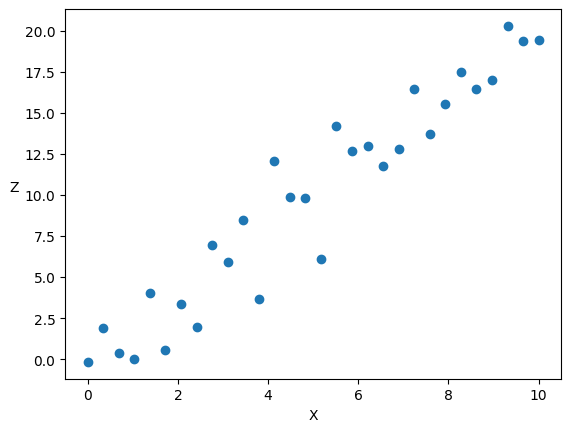

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x, z)
plt.xlabel('X')
plt.ylabel('Z  ', rotation=0)
plt.show()

Usamos, como lo hicimos la anterior vez, una neurona

<div style="text-align:center;">
  <img src="../01%20Introduccion%20a%20las%20redes%20neuronales/Imagenes/red_neuronal_regresion.png" alt="red neuronal regresion"> <!-- style="width:425px;height:626px;"> -->
</div>

## Inicialización aleatoria de *a*

In [3]:
import random

random.seed(45)
a = random.random()
a

0.2718754143840908

El valor de a es 0.271875, veamos qué recta saldría si parásemos ahora

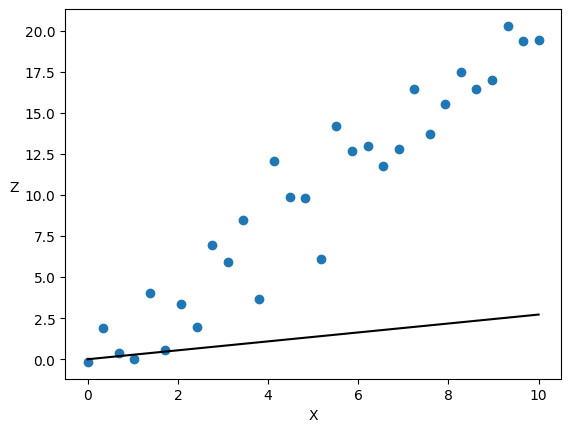

In [4]:
z_p = a*x

plt.scatter(x, z)
plt.plot(x, z_p, 'k')
plt.xlabel('X')
plt.ylabel('Z  ', rotation=0)
plt.show()

## Cálculo del error o loss

In [5]:
def loss_fn(z, z_p):
    n = len(z)
    loss = np.sum((z_p-z) ** 2) / n
    return loss

In [6]:
loss = loss_fn(z, z_p)
loss

103.72263739946467

Veamos cómo cambia la función de pérdida (loss) en función del valor de ```a```

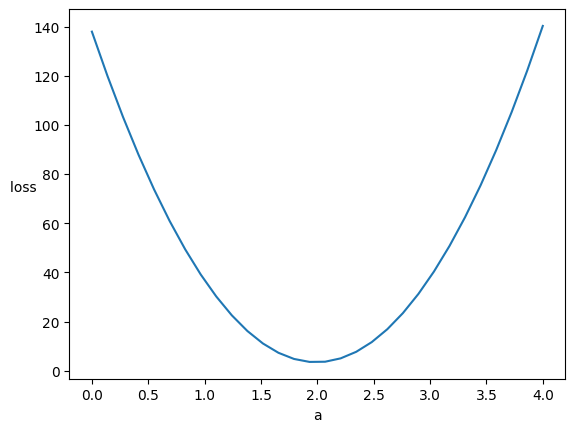

In [7]:
posibles_a = np.linspace(0, 4, 30)
perdidas = np.empty_like(posibles_a)

for i in range (30):
    z_p = posibles_a[i]*x
    perdidas[i] = loss_fn(z, z_p)

plt.plot(posibles_a, perdidas)
plt.xlabel('a')
plt.ylabel('loss  ', rotation=0)
plt.show()

## Descenso del gradiente

In [8]:
def gradiente (a, x, z):
    # Función que calcula el valor de una derivada en un punto
    n = len(z)
    return 2*np.sum((a*x - z)*x)/n

In [9]:
def gradiente_linea (i, a=None, error=None, gradiente=None, posibles_w=None, 
    losses=None, gradientes=None):
    # Función que devuleve los puntos de la linea que supone la derivada de una 
    # función en un punto dado
    if a is None:
        x1 = posibles_w[i]-0.7
        x2 = posibles_w[i]
        x3 = posibles_w[i]+0.7

        b = losses[i] - gradientes[i]*posibles_w[i]

        y1 = gradientes[i]*x1 + b
        y2 = losses[i]
        y3 = gradientes[i]*x3 + b
    else:
        x1 = a-0.7
        x2 = a
        x3 = a+0.7

        b = error - gradiente*a

        y1 = gradiente*x1 + b
        y2 = error
        y3 = gradiente*x3 + b

    x_linea = np.array([x1, x2, x3])
    y_linea = np.array([y1, y2, y3])

    return x_linea, y_linea

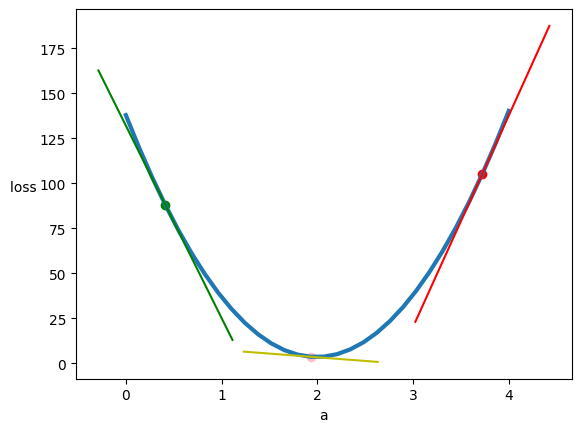

In [10]:
posibles_a = np.linspace(0, 4, 30)
perdidas = np.empty_like(posibles_a)
gradientes = np.empty_like(posibles_a)

for i in range (30):
    z_p = posibles_a[i]*x
    perdidas[i] = loss_fn(z, z_p)
    gradientes[i] = gradiente(posibles_a[i], x, z)  # Estos son los valores de las derivadas en cada valor de a
                                                    # es decir, nos da el valor de la pendiente de la recta tangente
                                                    # a la curva

# Se calcula la linea del gradiente en el inicio
i_inicio = 3
x_inicio, y_inicio = gradiente_linea(i_inicio, posibles_w=posibles_a, losses=perdidas, gradientes=gradientes)

# Se calcula la linea del gradiente en la base
i_base = 14
x_base, y_base = gradiente_linea (i_base, posibles_w=posibles_a, losses=perdidas, gradientes=gradientes)

# Se calcula la linea del gradiente al final
i_final = -3
x_final, y_final = gradiente_linea (i_final, posibles_w=posibles_a, losses=perdidas, gradientes=gradientes)


# Se dibuja el error en función de a
plt.plot(posibles_a, perdidas, linewidth = 3)
# Se dibuja la derivada al inicio
plt.plot(x_inicio, y_inicio, 'g')
plt.scatter(posibles_a[i_inicio], perdidas[i_inicio], c='green')
# Se dibuja la derivada en el medio
plt.plot(x_base, y_base, 'y')
plt.scatter(posibles_a[i_base], perdidas[i_base], c='pink')
# Se dibuja la derivada al final
plt.plot(x_final, y_final, 'r')
plt.scatter(posibles_a[i_final], perdidas[i_final], c='red')

plt.xlabel('a')
plt.ylabel('loss     ', rotation=0)
plt.show()

## Bucle de entrenamiento

In [11]:
LRs = [1e-2, 1e-3, 2.85e-2, 2.97e-2]

In [12]:
steps = 50  # Numero de veces que se realiza el bucle de enrtenamiento

# Matrices donde se guardarán los datos para luego ver la evolución del entrenamiento en una gráfica
Zs = np.empty([len(LRs), steps, len(x)])
Xs_linea_gradiente = np.empty([len(LRs), steps, len(x_inicio)])
Ys_linea_gradiente = np.empty([len(LRs), steps, len(y_inicio)])
As = np.empty([len(LRs), steps])
Errores = np.empty([len(LRs), steps])

for l, lr in enumerate(LRs):
    # Inicialización aleatoria de a
    random.seed(45)
    a = random.random()
    
    print(f"Entrenamiento para lr = {lr}")
    for i in range(steps):
        # Calculamos el gradiente
        dl = gradiente(a, x, z)

        # Corregimos el valor de a
        a = a - lr*dl

        # Calculamos los valores que obtiene la red neuronal
        z_p = a*x

        # Obtenemos el error
        error = loss_fn(z, z_p)

        # Obtenemos las rectas de los gradientes para representarlas
        x_linea_gradiente, y_linea_gradiente = gradiente_linea(i_inicio, a=a, error=error, gradiente=dl)

        # Guardamos los valores para luego ver la evolución del entrenamiento en una gráfica
        As[l][i] = a
        Zs[l][i] = z_p
        Errores[l][i] = error
        Xs_linea_gradiente[l][i] = x_linea_gradiente
        Ys_linea_gradiente[l][i] = y_linea_gradiente

        # Imprimimos la evolución del entrenamiento
        if (i+1)%10 == 0:
            print(f"i={i+1}: error={error}, gradiente={dl}, a={a}")
    print()

Entrenamiento para lr = 0.01
i=10: error=3.463120530309616, gradiente=-0.0043200939287479775, a=1.9913915041999943
i=20: error=3.4631205160567835, gradiente=-5.15087456539239e-08, a=1.9914120060962237
i=30: error=3.463120516056784, gradiente=-6.137312880127865e-13, a=1.991412006340669
i=40: error=3.463120516056784, gradiente=4.618527782440651e-15, a=1.991412006340672
i=50: error=3.463120516056784, gradiente=4.618527782440651e-15, a=1.991412006340672

Entrenamiento para lr = 0.001
i=10: error=28.075728775043547, gradiente=-61.98100236918255, a=1.1394358551489718
i=20: error=9.50524503591466, gradiente=-30.709631939506394, a=1.569284692740735
i=30: error=4.946395605365449, gradiente=-15.215654116766258, a=1.7822612353503635
i=40: error=3.8272482302958437, gradiente=-7.5388767490642445, a=1.887784395436304
i=50: error=3.552509863476323, gradiente=-3.7352756707945205, a=1.9400677933076504

Entrenamiento para lr = 0.0285
i=10: error=28.380997577746363, gradiente=62.325766055413354, a=1.1341

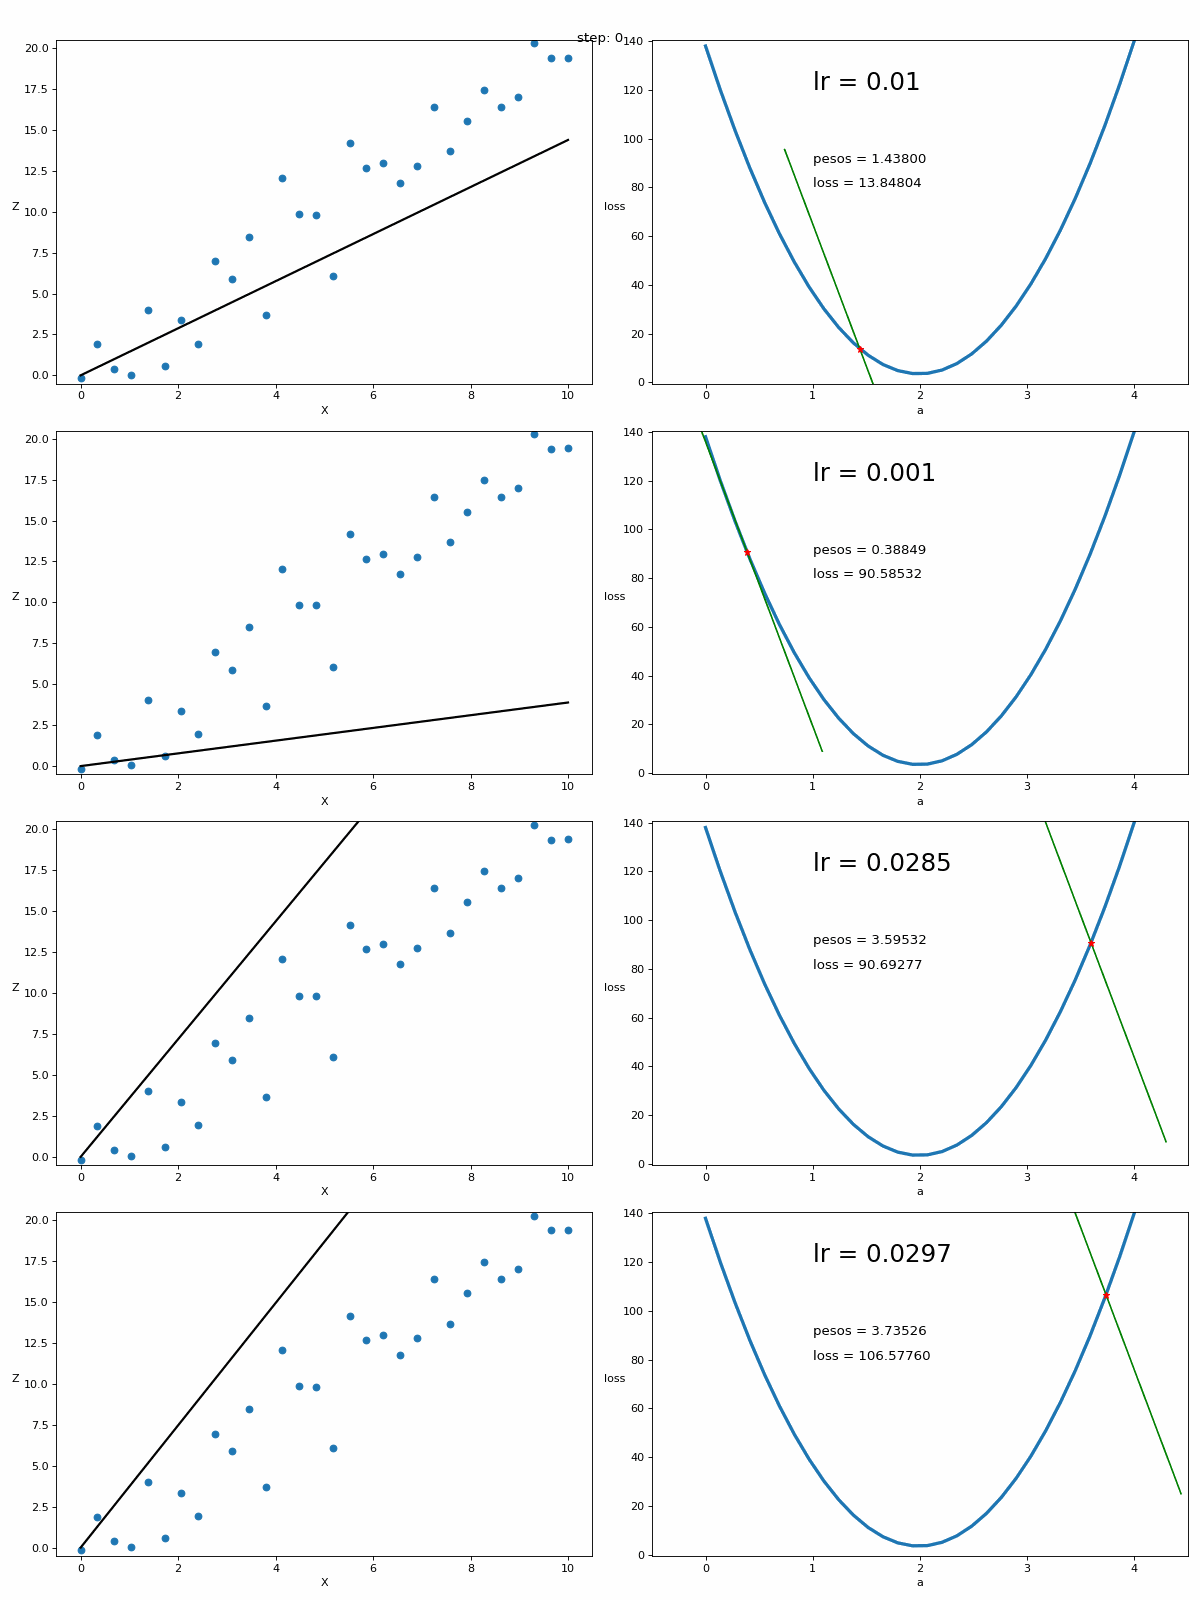

In [13]:
# Creamos GIF con la evolución del entrenamiento

from matplotlib.animation import FuncAnimation
from IPython.display import display, Image

rectas = []
gradientes = []
puntos = []
a_texts = []
error_texts = []
lr_texts = []

fontsize = 12
fontsize_LR = 22

# Creamos la gráfica inicial
fig, ax = plt.subplots(len(LRs),2, figsize=(15, 5*len(LRs)))
fig.set_tight_layout(True)
for i in range(len(LRs)):
    ax[i][0].set_xlabel('X')
    ax[i][0].set_ylabel('Z  ', rotation=0)
    ax[i][1].set_xlabel('a')
    ax[i][1].set_ylabel('loss  ', rotation=0)
    ax[i][0].set_xlim(-0.5, 10.5)
    ax[i][0].set_ylim(-0.5, 20.5)
    ax[i][1].set_xlim(-0.5, 4.5)
    ax[i][1].set_ylim(-0.5, 140.5)

    # Se dibujan los datos que persistiran en toda la evolución de la gráfica
    ax[i][0].scatter(x, z)
    ax[i][1].plot(posibles_a, perdidas, linewidth = 3)

    # Se dibuja el resto de lineas que irán cambiando durante el entrenamiento
    line1, = ax[i][0].plot(x, Zs[i][0], 'k', linewidth=2)                             # Recta generada con la pendiente a aprendida
    line2, = ax[i][1].plot(Xs_linea_gradiente[i][0], Ys_linea_gradiente[i][0], 'g')   # Gradiente de la función de error
    punto, = ax[i][1].plot(As[i][0], Errores[i][0], 'r*')                             # Punto donde se calcula el gradiente
    rectas.append(line1)
    gradientes.append(line2)
    puntos.append(punto)

    # Se dibujan textos dentro de la segunda figura del subplot
    a_text = ax[i][1].text(1, 90, f'pesos = {As[i][0]:.5f}', fontsize = fontsize)
    error_text = ax[i][1].text(1, 80, f'loss = {Errores[i][0]:.5f}', fontsize = fontsize)
    lr_text = ax[i][1].text(1, 120, f'lr = {LRs[i]}', fontsize = fontsize_LR)
    a_texts.append(a_text)
    error_texts.append(error_text)
    lr_texts.append(lr_text)
    
# Se dibuja un título
titulo = fig.suptitle(f'step: {0}', fontsize=fontsize)

# Se define la función que va a modificar la gráfica con la evolución del entrenamiento
def update(i):

    for l, _ in enumerate(LRs):
        # Se actualiza la recta generada con la pendiente a aprendida
        rectas[l].set_ydata(Zs[l][i])

        # Se actualiza el gradiente de la función de error
        gradientes[l].set_xdata(Xs_linea_gradiente[l][i])
        gradientes[l].set_ydata(Ys_linea_gradiente[l][i])

        # Se actualiza el punto 2. Punto donde se calcula el gradiente
        puntos[l].set_xdata([As[l][i]])
        puntos[l].set_ydata([Errores[l][i]])

        # Se actualizan los textos
        a_texts[l].set_text(f'pesos = {As[l][i]:.5f}')
        error_texts[l].set_text(f'loss = {Errores[l][i]:.5f}')
        lr_texts[l].set_text(f'lr = {LRs[l]}')
    
    titulo.set_text(f'step: {i}')

    return line1, # ax1, #line2, punto2, ax2, a_text, error_text

# Se crea la animación con un refresco cada 200 ms
interval = 500 # ms
anim = FuncAnimation(fig, update, frames=np.arange(0, steps), interval=interval)

# Se guarda en un GIF
gif_name = "GIFs/efecto_LRs.gif"
anim.save(gif_name, dpi=80, writer='pillow') 

# Leer el GIF y mostrarlo
with open(gif_name, 'rb') as f:
    display(Image(data=f.read()))

# Se elimina la figura para que no se muestre en el notebook
plt.close()

Se puede ver como con un $\alpha = 0.01$ casi en el step 4 se llega a la solución correcta.

Con $\alpha = 0.001$, como los saltos son más pequeños la red aprende más despacio, por lo que hasta el step 50, más o menos, no llega a la solución correcta

Con $\alpha = 0.0285$, ahora los saltos son más grandes, llega a la solución correcta, pero lo hace pivotando al rededor de ella

Con $\alpha = 0.0297$, los saltos son ya tan altos, que el valor de `a` cada vez se aleja más al valor que debe ser